# Classification of a Double-Moon (Moons)
The goal is to decide if a tuple **(x,y)** is part of one **Moon** or the other.<br>
Has been implemented a **Neural Network**, which:
- get the two coordinates as input x,y.
- gives as output the probability of being part of one **Moon** or the other one.

The **Layers** follow the following division:
- 2 inputs.
- 2 Hidden Layer composed of 10 Neurons each.
- 1 output Neuron.

The *"Loss-in-Time Curve"*, the *"Difference True-Result Curve"* and the *"Neuron Classes"* will be plot after the Training.

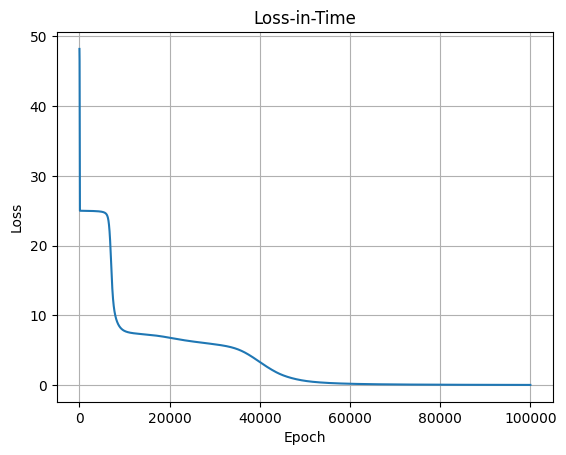

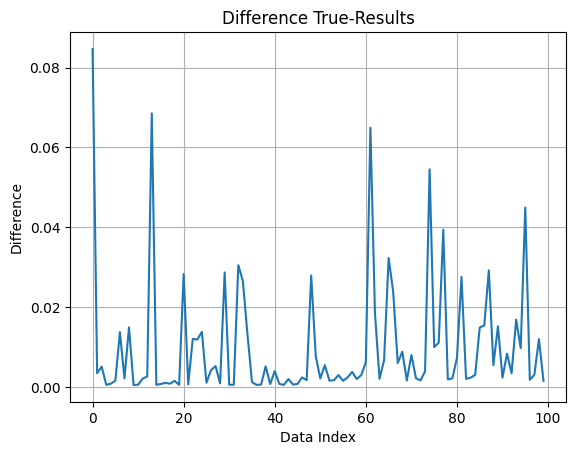

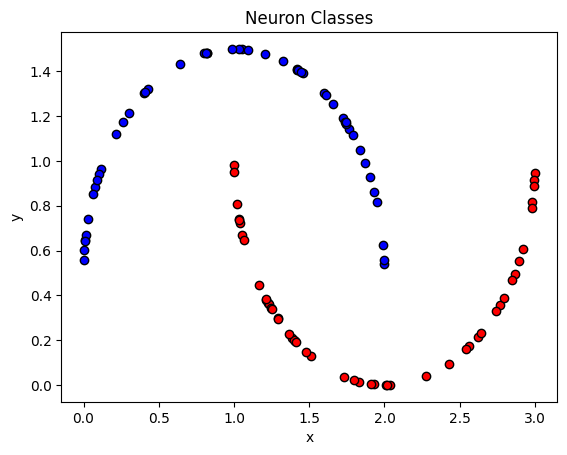

In [1]:
# import packages
import sys
import os
import math
import random
import matplotlib.pyplot as plt

# get path for Neuron
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("Moons_2D.ipynb"))))
sys.path.insert(0, parent_dir)

# Neuron import
import Neuron


# ----------------------------------------------- GENERATE THE MOONS DATASET -----------------------------------------------

def generate_moons(points_number = 100):
    dataset = []
    
    # first moon
    for _ in range(int(points_number/2)):
        theta = random.uniform(0, math.pi)
        x = 1 + math.cos(theta)
        y = 0.5 + math.sin(theta)
        dataset.append(([x, y], [0]))

    # second moon
    for _ in range(int(points_number/2)):
        theta = random.uniform(0, math.pi)
        x = 2 + math.cos(theta)
        y = 1 - math.sin(theta)
        dataset.append(([x, y], [1]))

    # return the dataset
    return dataset


# ------------------------------------------------ TRAIN THE NEURAL NETWORK ------------------------------------------------

# train the Neuron
data = generate_moons()
layer_list = []
layer_list.append(Neuron.Layer(10,2))
layer_list.append(Neuron.Layer(10,10))
layer_list.append(Neuron.Layer(1,10))
nr = Neuron.Network(layer_list)
loss = nr.train(data, 100000)

# plot the Loss-in-Time
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss-in-Time")
plt.grid(True)
plt.show()

# get after-train results
result = []
diff = []
for input, target in data:
    new_res = nr.forward(input)
    result.append(new_res[0])
    diff.append(abs(target[0] - new_res[0]))


# plot the Difference True-Results
plt.plot(diff)
plt.xlabel("Data Index")
plt.ylabel("Difference")
plt.title("Difference True-Results")
plt.grid(True)
plt.show()


# ---------------------------------------------------- PLOT THE CLASSES ----------------------------------------------------

# Plot the original Data-Set classified
for i in range(len(data)):
    color = 'blue' if result[i] < 0.5 else 'red'
    x = data[i][0]
    plt.scatter(x[0], x[1], color=color, edgecolor='k')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Neuron Classes")
plt.show()